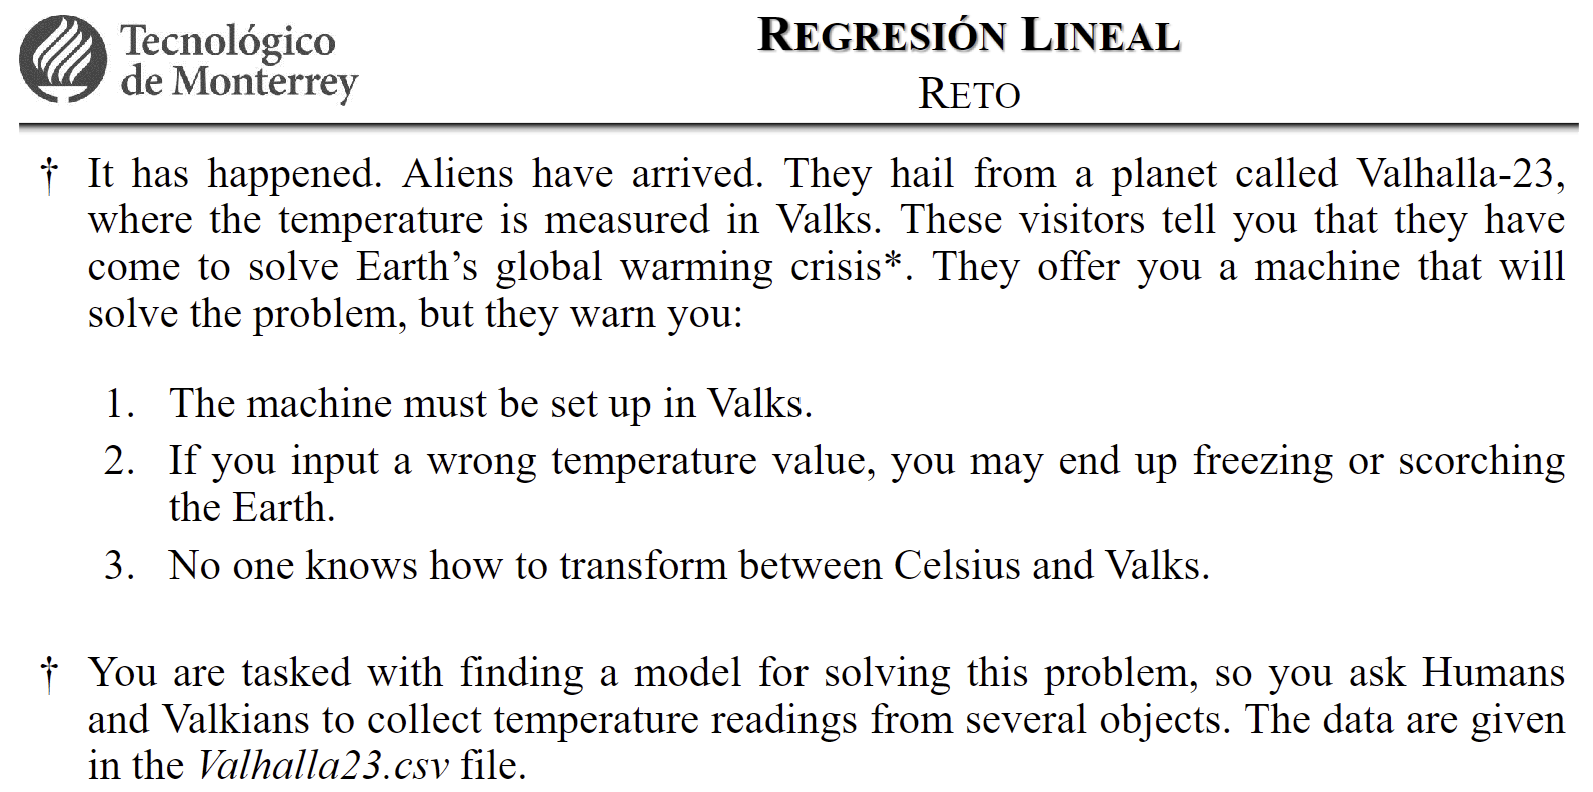

# Dataframe

In [1]:
import pandas as pd
import numpy as np

# Leer el archivo CSV
df = pd.read_csv('valhalla23.csv')

# Mezclar los índices de forma aleatoria
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
test_size = int(0.2 * len(df))  # El 20% de los datos para el conjunto de prueba

# Conjunto de prueba
df_test = df_shuffled.iloc[:test_size].copy()

# Conjunto de entrenamiento
df_train = df_shuffled.iloc[test_size:].copy()

# Visualización

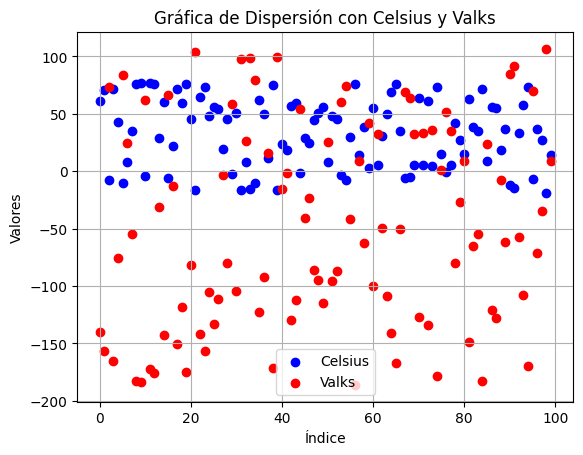

In [2]:
import matplotlib.pyplot as plt

# Crear la gráfica de dispersión
plt.scatter(df.index, df['Celsius'], label='Celsius', color='blue')
plt.scatter(df.index, df['Valks'], label='Valks', color='red')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Gráfica de Dispersión con Celsius y Valks')
plt.legend()
plt.grid(True)
plt.show()

# Algoritmo sin framework y resultados

In [3]:
n = len(df_train)
alpha = 0.0001
theta_0 = 1
theta_1 = 1

iteraciones = 100000

# h0 = omega_0 + omega_1 * x
# Diferencial = h0 - y

for _ in range(iteraciones):

    df_train['h0'] = theta_0 + theta_1 * df_train['Celsius']
    df_train['Delta'] = df_train['h0'] - df_train['Valks']
    df_train['Delta por x'] = df_train['Delta'] * df_train['Celsius']

    theta_0 = theta_0 - (alpha * (1/n) * df_train['Delta'].sum())
    theta_1 = theta_1 - (alpha * (1/n) * df_train['Delta por x'].sum())

df_train['Valks_pred'] = theta_0 + (theta_1 * df_train['Celsius'])
    
# Extrae las columnas como arrays de Numpy
y_true = df_train['Valks'].values
y_pred = df_train['Valks_pred'].values

# Calcula el error cuadrático
squared_errors = (y_true - y_pred) ** 2

# Calcula el MSE
mse = np.mean(squared_errors)

print("Mean Squared Error:", mse)

Mean Squared Error: 50.861301401777425


La función de costo con el error cuadrático medio en el conjunto de entrenamiento fue de 50.8613 con un alpha de 0.0001, thetas iniciales de 1 y 100,000 iteraciones. Se escogieron dichos parámetros ya que fueron los que menor error cuádratico dieron sin sacrificar tanto tiempo computacional.

In [4]:
df_test['Valks_pred'] = theta_0 + (theta_1 * df_test['Celsius'])
    
# Extrae las columnas como arrays de Numpy
y_true = df_test['Valks'].values
y_pred = df_test['Valks_pred'].values

# Calcula el error cuadrático
squared_errors = (y_true - y_pred) ** 2

# Calcula el MSE
mse = np.mean(squared_errors)

print("Mean Squared Error:", mse)

Mean Squared Error: 21.050074291729732


La función de costo con el error cuadrático medio en el conjunto de prueba fue de 21.05 con un alpha de 0.0001, thetas iniciales de 1 y 100,000 iteraciones. Se escogieron dichos parámetros ya que fueron los que menor error cuádratico dieron sin sacrificar tanto tiempo computacional.

In [5]:
df['Valks_pred'] = theta_0 + (theta_1 * df['Celsius'])
    
# Extrae las columnas como arrays de Numpy
y_true = df['Valks'].values
y_pred = df['Valks_pred'].values

# Calcula el error cuadrático
squared_errors = (y_true - y_pred) ** 2

# Calcula el MSE
mse = np.mean(squared_errors)

print("Mean Squared Error:", mse)

Mean Squared Error: 44.899055979767894


Para el conjunto completo de datos la función de costo con error de cuadrático medio fue de 44.899

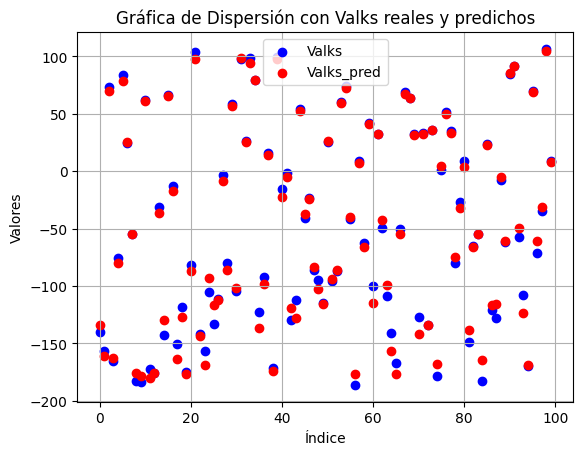

In [6]:
import matplotlib.pyplot as plt

# Crear la gráfica de dispersión
plt.scatter(df.index, df['Valks'], label='Valks', color='blue')
plt.scatter(df.index, df['Valks_pred'], label='Valks_pred', color='red')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Gráfica de Dispersión con Valks reales y predichos')
plt.legend()
plt.grid(True)
plt.show()

En la gráfica se puede ver que se predice de muy buena manera la variable de Valks a partir de la variable de Celsius